In [2]:
import pandas as pd

# Load the CSVs
grid_search_df = pd.read_csv("grid_search_results.csv")
mae_df = pd.read_csv("final_mae_results.csv", names=["num_layer", "num_dim", "val_mae"])

# Merge on num_layer and num_dim
grid_search_df = grid_search_df.merge(mae_df, on=["num_layer", "num_dim"], how="left")

# Save the updated CSV
grid_search_df.to_csv("grid_search_results_updated.csv", index=False)

print("Updated CSV saved as 'grid_search_results_updated.csv'")
print(grid_search_df.head())  # Preview first few rows


Updated CSV saved as 'grid_search_results_updated.csv'
   num_layer  num_dim  train_time_sec   gpu_peak_mb   val_mae
0          2        8       89.980248   6958.697754  0.683492
1          2       16      160.642297   8154.337402  0.656691
2          2       32      492.863653  10553.440430  0.646669
3          3        8      391.825333   7592.608887  0.654456
4          3       16      417.379264   9302.087891  0.652913


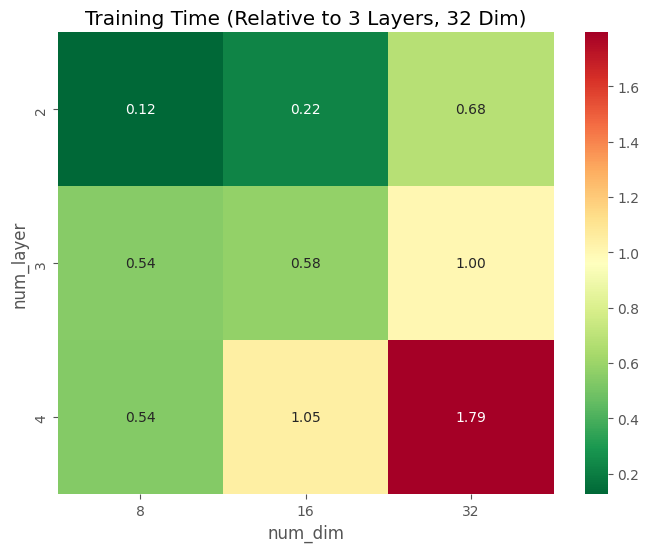

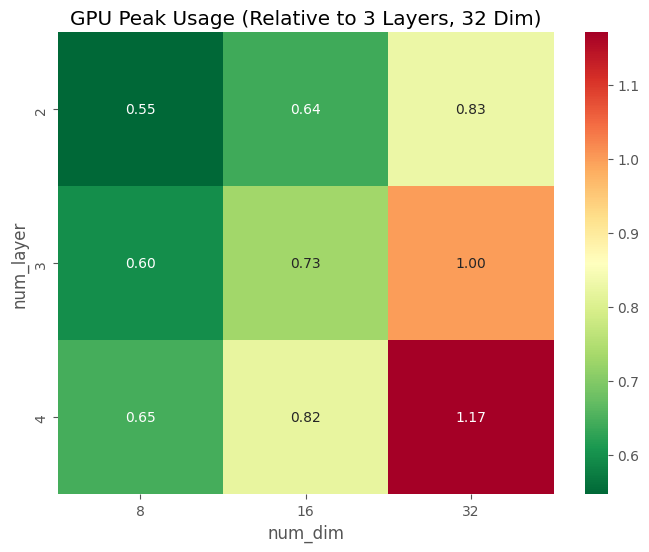

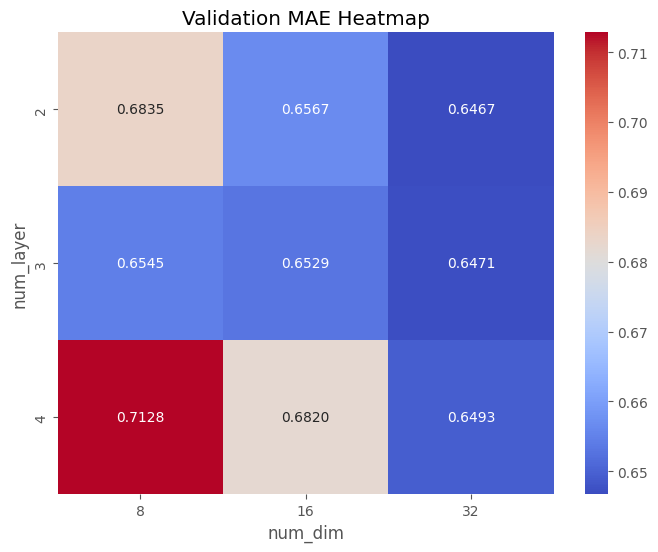

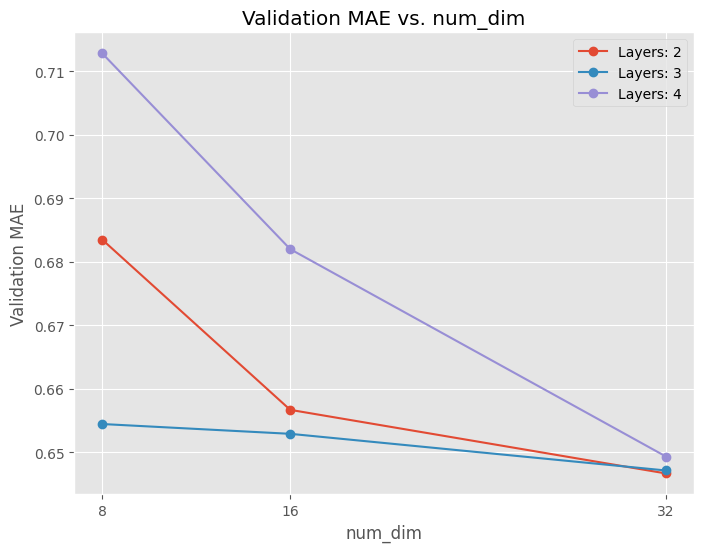

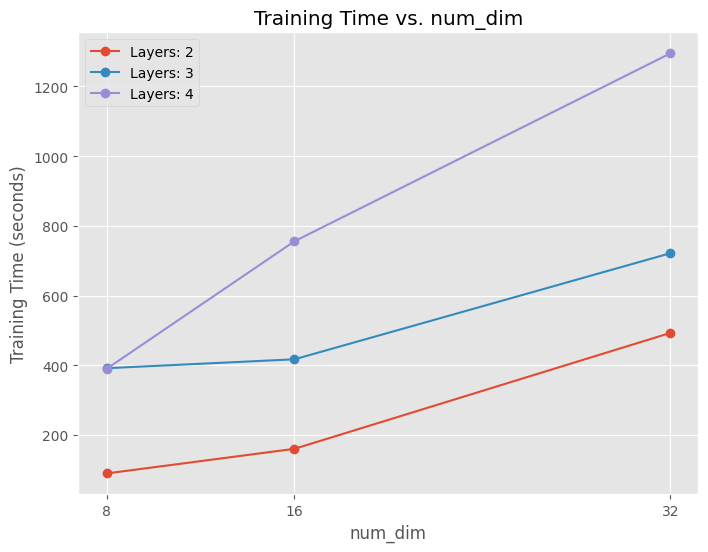

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/profiling_results/memory/grid_search_results_updated.csv")

# Set plot style
plt.style.use("ggplot")

# Ensure correct data types
df["num_layer"] = df["num_layer"].astype(str)
df["num_dim"] = df["num_dim"].astype(int)

# Reference values for normalization
baseline_layers = "3"
baseline_dim = 32
baseline_time = df.loc[
    (df["num_layer"] == baseline_layers) & (df["num_dim"] == baseline_dim), "train_time_sec"
].values[0]
baseline_gpu = df.loc[
    (df["num_layer"] == baseline_layers) & (df["num_dim"] == baseline_dim), "gpu_peak_mb"
].values[0]

# Normalize training time and GPU memory usage
df["train_time_pct"] = df["train_time_sec"] / baseline_time
pivot_time = df.pivot(index="num_layer", columns="num_dim", values="train_time_pct").sort_index(axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_time.astype(float), annot=True, cmap="RdYlGn_r", fmt=".2f")
plt.title("Training Time (Relative to 3 Layers, 32 Dim)")
plt.xlabel("num_dim")
plt.ylabel("num_layer")
plt.savefig("train_time_relative_heatmap.png")
plt.show()

# Normalize GPU usage
df["gpu_peak_pct"] = df["gpu_peak_mb"] / baseline_gpu
pivot_gpu = df.pivot(index="num_layer", columns="num_dim", values="gpu_peak_pct").sort_index(axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_gpu.astype(float), annot=True, cmap="RdYlGn_r", fmt=".2f")
plt.title("GPU Peak Usage (Relative to 3 Layers, 32 Dim)")
plt.xlabel("num_dim")
plt.ylabel("num_layer")
plt.savefig("gpu_usage_relative_heatmap.png")
plt.show()

plt.figure(figsize=(8, 6))
pivot_mae = df.pivot(index="num_layer", columns="num_dim", values="val_mae").sort_index(
    axis=1
)
sns.heatmap(pivot_mae.astype(float), annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Validation MAE Heatmap")
plt.xlabel("num_dim")
plt.ylabel("num_layer")
plt.savefig("val_mae_heatmap.png")
plt.show()


plt.figure(figsize=(8, 6))
for layer in df["num_layer"].unique():
    subset = df[df["num_layer"] == layer].sort_values(
        by="num_dim"
    )  # Ensure num_dim is sorted
    plt.plot(subset["num_dim"], subset["val_mae"], marker="o", label=f"Layers: {layer}")

plt.title("Validation MAE vs. num_dim")
plt.xlabel("num_dim")
plt.ylabel("Validation MAE")
plt.xticks(sorted(df["num_dim"].unique()))
plt.legend()
plt.savefig("val_mae_lineplot.png")
plt.show()

plt.figure(figsize=(8, 6))
for layer in df["num_layer"].unique():
    subset = df[df["num_layer"] == layer].sort_values(by="num_dim")
    plt.plot(
        subset["num_dim"],
        subset["train_time_sec"],
        marker="o",
        label=f"Layers: {layer}",
    )

plt.title("Training Time vs. num_dim")
plt.xlabel("num_dim")
plt.ylabel("Training Time (seconds)")
plt.xticks(sorted(df["num_dim"].unique()))
plt.legend()
plt.savefig("train_time_lineplot.png")
plt.show()